In [11]:
import skimage.io
import glob

from PIL import Image
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image as kimage
import numpy as np
from numpy import dot
from numpy.linalg import norm
import scipy.sparse as sp
import skimage.io
import random
import matplotlib

In [23]:
input_imgs = glob.glob('./datas/*.png')

In [24]:
model = VGG16(include_top=False, weights='imagenet')

In [25]:
features_list = []
for img in input_imgs:
    img = kimage.load_img(img, target_size=(224, 224))
    img_data = kimage.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    pred = model.predict(img_data)
    vgg16_feature_np = np.array(pred)
    features_list.append(vgg16_feature_np.flatten())

In [26]:
target_img = np.random.choice(glob.glob('./datas/*.png'))
img = kimage.load_img(target_img, target_size=(224, 224))
img_data = kimage.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
pred = model.predict(img_data)
vgg16_feature_np = np.array(pred)
target_img_feature = vgg16_feature_np.flatten()

In [27]:
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [28]:
cos_sims = []
for idx, feature in enumerate(features_list):
    x = cos_sim(target_img_feature,feature)
    cos_sims.append(x)
sorted_cos = sorted(cos_sims)

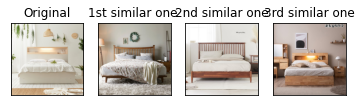

1st similar one :  0.3651686
2nd similar one :  0.35521802
3rd similar one :  0.33884263


In [29]:
plt.subplot(141)
original = Image.open(target_img)
plt.imshow(original)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(142)
no1_similar_img = Image.open(input_imgs[cos_sims.index(sorted_cos[-2])])
plt.imshow(no1_similar_img)
plt.title('1st similar one ')
plt.xticks([])
plt.yticks([])

plt.subplot(143)
no2_similar_img = Image.open(input_imgs[cos_sims.index(sorted_cos[-3])])
plt.imshow(no2_similar_img)
plt.title('2nd similar one')
plt.xticks([])
plt.yticks([])

plt.subplot(144)
no3_similar_img = Image.open(input_imgs[cos_sims.index(sorted_cos[-4])])
plt.imshow(no3_similar_img)
plt.title('3rd similar one')
plt.xticks([])
plt.yticks([])

plt.show()
print ('1st similar one : ', cos_sims[cos_sims.index(sorted_cos[-2])])
print ('2nd similar one : ', cos_sims[cos_sims.index(sorted_cos[-3])])
print ('3rd similar one : ', cos_sims[cos_sims.index(sorted_cos[-4])])
